# Netflix Movie Data

This dataset contains more than 8,500 Netflix movies and TV shows, including cast members, duration, and genre. It contains titles added as recently as late September 2021.

### Importing Libraries

In [15]:
# Import  libraries under their usuals alias
import pandas as pd
import matplotlib.pyplot as plt

# Setting matplotlib and warnings

plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

 ### Loading friend's data into a dictionary

In [16]:
# Create the years and durations lists
years = [2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]
durations = [103, 101, 99, 100, 100, 95, 95, 96, 93,90]

# Create a dictionary with the two lists
movie_dict = {"years": years, "durations": durations}

# Print the dictionary
movie_dict

{'years': [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
 'durations': [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]}

### Creating a DataFrame from a dictionary


In [17]:
# Create a DataFrame from the dictionary
durations_df = pd.DataFrame(movie_dict)

# Print the DataFrame
print(durations_df)

   years  durations
0   2011        103
1   2012        101
2   2013         99
3   2014        100
4   2015        100
5   2016         95
6   2017         95
7   2018         96
8   2019         93
9   2020         90


### A visual inspection of our data

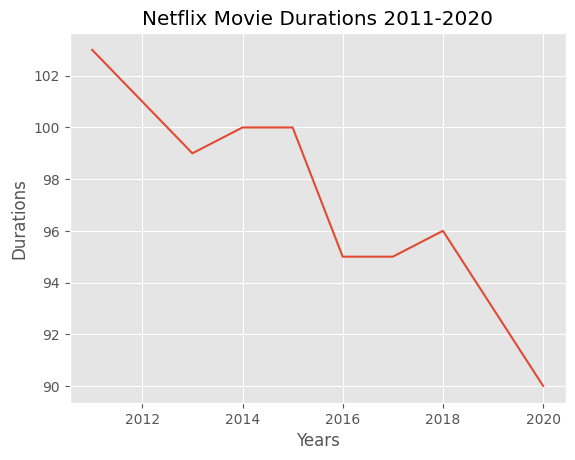

In [18]:
# create a figure
fig = plt.figure()

# Draw a line plot of release_years and durations
plt.plot(durations_df['years'],durations_df['durations'])

# Create a title
plt.title( "Netflix Movie Durations 2011-2020")
plt.xlabel("Years")
plt.ylabel("Durations")

# Show the plot
plt.show()

### Loading the rest of the data from a CSV

In [19]:
# Read in the CSV as a DataFrame
netflix_df = pd.read_csv("netflix_dataset.csv")

# Print the first five rows of the DataFrame
netflix_df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### Exploratory Analysis to know variables and check for values NA

In [20]:
#types of variables

netflix_df.info()

#checking for values NA

netflix_df.isna().sum().sort_values()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


show_id            0
type               0
title              0
release_year       0
listed_in          0
description        0
duration           3
rating             4
date_added        10
cast             825
country          831
director        2634
dtype: int64

In [21]:
# Describe Qualitative variables (type object)

netflix_df.select_dtypes(include=['object']).describe()

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


In [22]:
# Describe Quantitative variables (type int64)

round(netflix_df.select_dtypes(include=['int64']).describe(),1)

,release_year
count,8807.0
mean,2014.2
std,8.8
min,1925.0
25%,2013.0
50%,2017.0
75%,2019.0
max,2021.0


### Filtering for movies!

In [23]:

# Subset the DataFrame for type "Movie"
netflix_df_movies_only = netflix_df[(netflix_df['type'] == 'Movie')]

# Select only the columns of interest
netflix_movies_col_subset = netflix_df_movies_only.iloc[:,[2,5,10,7,9]]

# Print the first five rows of the new DataFrame
netflix_movies_col_subset.head(5)

,title,country,listed_in,release_year,duration
0,Dick Johnson Is Dead,United States,Documentaries,2020,90 min
6,My Little Pony: A New Generation,NaN,Children & Family Movies,2021,91 min
7,Sankofa,"United States, Ghana, Burkina Faso, United Kin...","Dramas, Independent Movies, International Movies",1993,125 min
9,The Starling,United States,"Comedies, Dramas",2021,104 min
12,Je Suis Karl,"Germany, Czech Republic","Dramas, International Movies",2021,127 min


### Transform from string to float column 'duraction'

In [24]:

# drop string 'min' of the column duration and convert on float
netflix_movies_col_subset['duration'] = netflix_df_movies_only['duration'].str.replace('min','').astype(float)

netflix_movies_col_subset.head(5)

,title,country,listed_in,release_year,duration
0,Dick Johnson Is Dead,United States,Documentaries,2020,90.0
6,My Little Pony: A New Generation,NaN,Children & Family Movies,2021,91.0
7,Sankofa,"United States, Ghana, Burkina Faso, United Kin...","Dramas, Independent Movies, International Movies",1993,125.0
9,The Starling,United States,"Comedies, Dramas",2021,104.0
12,Je Suis Karl,"Germany, Czech Republic","Dramas, International Movies",2021,127.0


### Creating a scatter plot

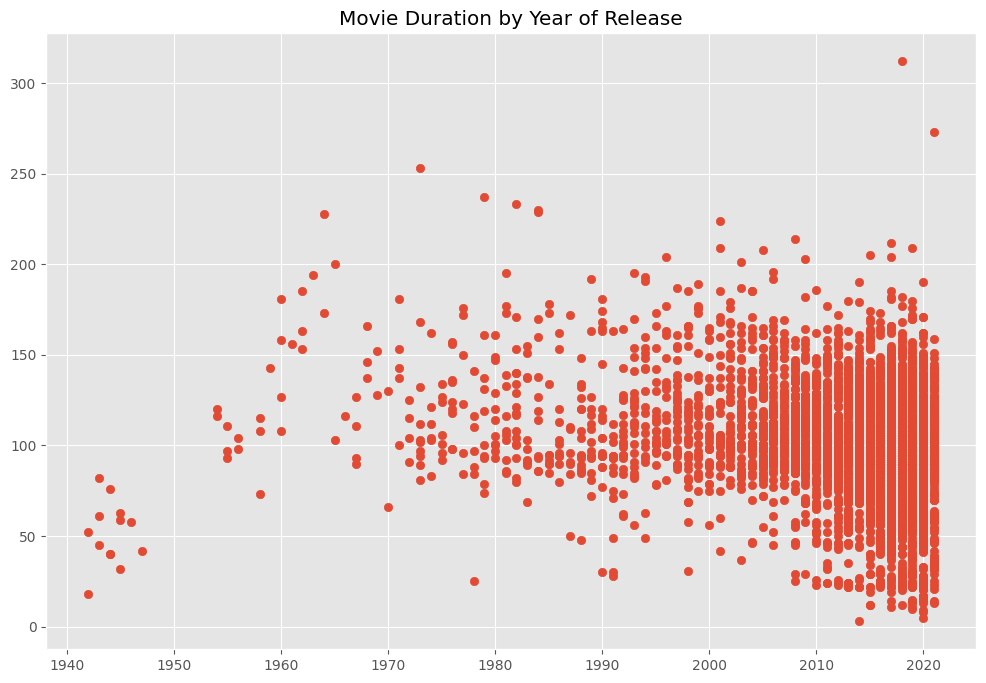

In [25]:
# Create a figure and increase the figure size
fig = plt.figure(figsize=(12,8))

# Create a scatter plot of duration versus year
plt.scatter(x = netflix_movies_col_subset['release_year'], y = netflix_movies_col_subset['duration'])

# Create a title
plt.title("Movie Duration by Year of Release")

# Show the plot
plt.show()

### Digging deeper

In [26]:
# Filter for durations shorter than 60 minutes
short_movies = netflix_movies_col_subset[netflix_movies_col_subset['duration'] < 60]

# Print the first 20 rows of short_movies
short_movies.head(10).sort_values('duration', ascending= False)

,title,country,listed_in,release_year,duration
279,Monster Hunter: Legends of the Guild,"United States, Japan","Action & Adventure, Anime Features, Children &...",2021,59.0
77,Little Singham - Black Shadow,NaN,"Children & Family Movies, Comedies",2021,48.0
484,Lee Su-geun: The Sense Coach,NaN,Stand-Up Comedy,2021,46.0
470,Bridgerton - The Afterparty,NaN,Movies,2021,39.0
560,Audible,NaN,"Documentaries, Sports Movies",2021,39.0
495,Awon Boyz,NaN,"Documentaries, International Movies",2019,38.0
45,My Heroes Were Cowboys,NaN,Documentaries,2021,23.0
71,A StoryBots Space Adventure,NaN,Children & Family Movies,2021,13.0
694,Aziza,"Lebanon, Syria","Comedies, Dramas, Independent Movies",2019,13.0
695,Besieged Bread,NaN,"Dramas, International Movies",2015,12.0


### Marking non-feature films

In [27]:
# Define an empty list
colors = []

# Iterate over rows of netflix_movies_col_subset
for index , row in netflix_movies_col_subset.iterrows() :
    if row['listed_in'] == "Children & Family Movies":
        colors.append("red")
    elif row['listed_in'] == "Documentaries":
        colors.append("blue")
    elif  row['listed_in'] == "Stand-Up Comedy":
        colors.append("green")
    else:
         colors.append("black")
        
# Inspect the first 10 values in your list        
print(colors[0:10])

['blue', 'red', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'red']


### Plotting with color!

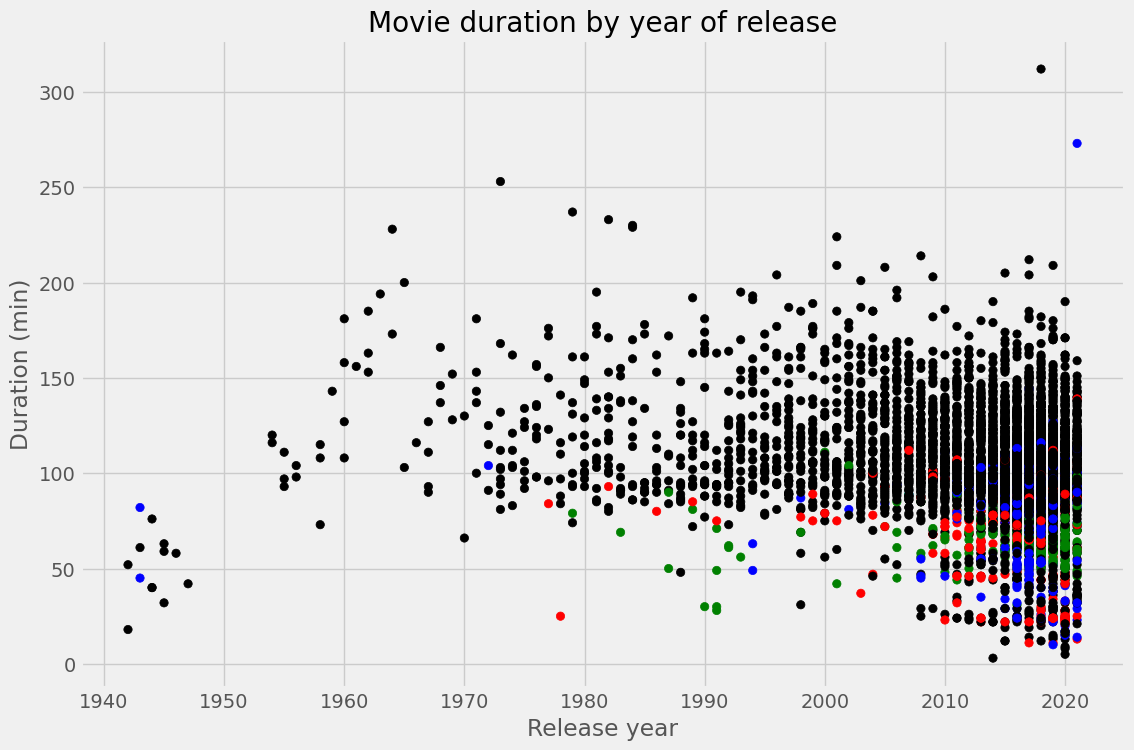

In [28]:
# Set the figure style and initalize a new figure
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,8))

# Create a scatter plot of duration versus release_year
plt.scatter(netflix_movies_col_subset['release_year'], netflix_movies_col_subset['duration'], color = colors )

# Create a title and axis labels
plt.title("Movie duration by year of release")
plt.xlabel("Release year")
plt.ylabel('Duration (min)')

# Show the plot
plt.show()

Working on it...